In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [12]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own
import math
class SGD:
    
    def __init__(self, x):
        self.w = np.zeros_like(X_train[0])
        self.b = 0
     
    def Sigmoid(self, x):
        return 1 / (1 + np.exp(-(np.dot(x, self.w.T) + self.b)))  
    
    #Gradient of Weight
    def grad_w(self, x, y, lamda, N):
        y_pred = self.Sigmoid(x)  
        return (-x * (y - y_pred)) + ((lamda / N)  * self.w) 
    
    #Gradient of Intercept
    def grad_b(self, x, y):
        y_pred = self.Sigmoid(x)
        return (-y + y_pred)
    
    def loss(self, y, y_pred, lamda):
        h1 = - y * np.log10(y_pred) 
        h2 = - (1 - y) * np.log10(1 - y_pred)
        h3 = (1 / len(y)) * (lamda / 2) * np.sum(np.square(self.w))
        #h = np.sum((y * np.log10(y_pred) + (1 - y) * np.log10(1 - y_pred)) + ((1 / len(y)) * (lamda / 2) * np.sum(np.square(self.w))))
        h = np.sum(h1 + h2 + h3)
        return h / len(y)

    def fit(self, x, y, x_t, y_t, epochs = 1, alpha = 1, lamda = 1): 
        N = len(x)
        loss = []
        loss1 = []
        #Calculation of Initial Loss
        y_pred = self.Sigmoid(x)
        ini = self.loss(y, y_pred, lamda)
        print("Inital_train_loss = ", ini)
        loss.append(ini)
        
        y_pred_test = self.Sigmoid(x_t)
        ini1 = self.loss(y_t, y_pred_test, lamda)
        print("Inital_test_loss = ", ini1)
        loss1.append(ini)
        
        
        for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            for x1, y1 in zip(x, y):
            #j = np.random.choice(N, replace = False)
            # Updation of Weight and Intercept 
                self.w -= alpha * self.grad_w(x1, y1, lamda, N)
                self.b -= alpha * self.grad_b(x1, y1)
            
            y_pred = self.Sigmoid(x)
            train = self.loss(y, y_pred, lamda)   
            loss.append(train)
            
            y_pred_test = self.Sigmoid(x_t)
            test = self.loss(y_t, y_pred_test, lamda)
            loss1.append(test)
            
            if(loss[-1] == loss[-2]):
                break
        
            print("Epoch", epoch, "Train_loss", train, "Test_loss", test)
        
        p = list(range(0,epochs+1))
        print("Optimal_weigth_vector", self.w)
        print("Optimal_intercept", self.b)
        plt.plot(loss, label = 'Train_loss')
        plt.plot(loss1, label = 'Test_loss')
        plt.scatter(p, loss)
        plt.scatter(p, loss1)
        plt.xlabel('Epochs')
        plt.ylabel('Log_loss')
        plt.grid(True)
        plt.legend
        plt.show()  
            
    
    def pred(self, x):
        predict = []
        for x1 in x:
            if self.Sigmoid(x1) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
                predict.append(1)
            else:
                predict.append(0)
        return np.array(predict)

In [13]:
sgd = SGD(X_train)

Inital_train_loss =  0.3010299956639812
Inital_test_loss =  0.3010299956639812


Epoch 0 Train_loss 0.175469263007417 Test_loss 0.17596688093034574
Epoch 1 Train_loss 0.16868174548072296 Test_loss 0.16940989946376206
Epoch 2 Train_loss 0.16639953508321123 Test_loss 0.16721415690323105
Epoch 3 Train_loss 0.16537405040172315 Test_loss 0.16622329884489517
Epoch 4 Train_loss 0.16486122148174245 Test_loss 0.16572403978659642
Epoch 5 Train_loss 0.16459114654172863 Test_loss 0.16545877263402292
Epoch 6 Train_loss 0.1644448002489042 Test_loss 0.16531365673321544
Epoch 7 Train_loss 0.16436411674725512 Test_loss 0.1652328402115104
Epoch 8 Train_loss 0.16431912464311102 Test_loss 0.16518728324959892
Epoch 9 Train_loss 0.1642938307002037 Test_loss 0.165161365793308

Optimal_weigth_vector [-0.42315311  0.19095979 -0.14588118  0.33814991 -0.21196623  0.56525978
 -0.44538357 -0.09171679  0.21795314  0.16977398  0.19522044  0.00229554
 -0.07781461  0.33882618  0.02214234]
Optimal_intercept -0.8500967712838059


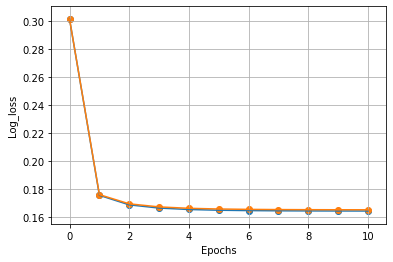

In [14]:
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
sgd.fit(X_train, y_train, X_test, y_test, epochs = 10, alpha = eta0, lamda = alpha)

In [15]:
# Accuracy of Train and Test
print(1-np.sum(y_train - sgd.pred(X_train))/len(X_train))
print(1-np.sum(y_test  - sgd.pred(X_test))/len(X_test))

0.95536
0.95296


In [16]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
sgd.w-clf.coef_, sgd.b-clf.intercept_

(array([[ 0.0002138 ,  0.00548413,  0.00270918, -0.00329416, -0.00377953,
          0.00509399,  0.00704126,  0.00237134,  0.00867994, -0.01106728,
         -0.00183147, -0.00192361,  0.00178909,  0.00029817, -0.00052487]]),
 array([0.00304153]))

In [17]:
def sigmoid(w, x, b):
        return 1 / (1 + np.exp(-(np.dot(x, w.T) + b))) 

def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(sgd.w,sgd.b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(sgd.w,sgd.b,X_test))/len(X_test))

0.95536
0.95296
